In [0]:
!pip install -q kaggle

In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"roshansalian","key":"31f29253772112aa0d4967ae625aef6e"}'}

In [0]:
!mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [0]:
! kaggle competitions download -c 'expedia-personalized-sort'

 85% 23.0M/27.2M [00:00<00:00, 30.9MB/s]
100% 27.2M/27.2M [00:00<00:00, 78.2MB/s]
 18% 5.00M/27.1M [00:00<00:01, 16.2MB/s]
100% 27.1M/27.1M [00:00<00:00, 68.6MB/s]
 19% 5.00M/26.0M [00:00<00:01, 20.2MB/s]
100% 26.0M/26.0M [00:00<00:00, 74.6MB/s]
 96% 397M/414M [00:03<00:00, 119MB/s]
100% 414M/414M [00:03<00:00, 109MB/s]


In [0]:
!unzip basicPythonBenchmark.zip

Archive:  basicPythonBenchmark.zip
  inflating: basicPythonBenchmark.csv  


In [0]:
!unzip data.zip

Archive:  data.zip
  inflating: test.csv                
  inflating: train.csv               


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [0]:
print(train.columns)

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate'

In [0]:
data = train[['price_usd', 'srch_booking_window']]

In [0]:
from sklearn.cluster import KMeans
wcss=[]
for i in range (1, 21):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter=300, n_init=10)
  kmeans.fit(data)
  wcss.append(kmeans.inertia_)


https://www.kaggle.com/nikitsoftweb/production-time-series-of-price-anomaly-detection


In [0]:
print(data.columns.isnull().sum())

In [0]:
print(data['price_usd'].unique())

In [0]:
data['prop_review_score'] = data['prop_review_score'].fillna(data['prop_review_score'].mode().iloc[0])

In [0]:
plt.plot(range(1, 21), wcss)
plt.show()

In [0]:
X = train[['price_usd', 'srch_booking_window']]
X = X.reset_index(drop=True)
kmeans = KMeans(n_clusters=12)
kmeans.fit(X)
y_pred = kmeans.fit_predict(X)
labels = kmeans.labels_

KeyboardInterrupt: ignored

In [0]:
fig = plt.figure(1, figsize=(12,12))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels.astype(np.float), edgecolor="r")


plt.show()

In [0]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
data = train[['price_usd', 'srch_booking_window', 'srch_saturday_night_bool', 'prop_review_score']]

X_std = StandardScaler().fit_transform(X)
data = pd.DataFrame(X_std)
pca = PCA(n_components=2)
data = pca.fit_transform(data)
scaler = StandardScaler()
np_scaled = scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)

In [0]:
df= data

In [0]:
from sklearn.cluster import KMeans

kmeans = [KMeans(n_clusters=i).fit(data) for i in range(8, 10)]
df['cluster'] = kmeans[1].predict(data)
df.index = data.index
df['principal_feature1'] = data[0]
df['principal_feature2'] = data[1]
df['cluster'].value_counts()

0    6419801
1    2205365
5     951754
3     339405
8       1018
7        124
2         55
6          7
4          1
Name: cluster, dtype: int64

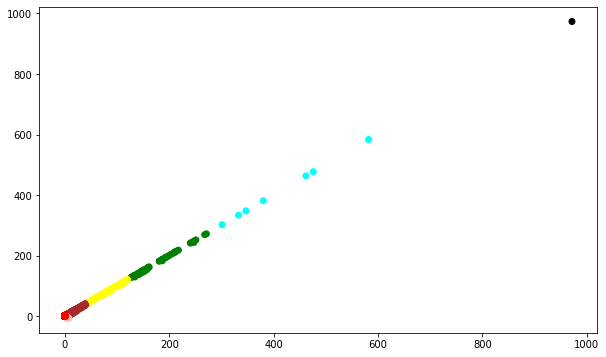

In [0]:
# plot the different clusters with the 2 main features
fig, ax = plt.subplots(figsize=(10,6))
colors = {0:'red', 1:'blue', 2:'green', 3:'pink', 4:'black', 5:'orange', 6:'cyan', 7:'yellow', 8:'brown', 9:'purple', 10:'white', 11: 'grey'}
ax.scatter(df['principal_feature1'], df['principal_feature2'], c=df["cluster"].apply(lambda x: colors[x]))
plt.show();